# Agregación y agrupación

Una parte esencial del análisis de grandes cantidades de datos es la sumarización eficiente; la capacidad de hacer operaciones tales como ``sum()``, ``mean()``, ``median()``, ``min()``, and ``max()`` dónde un sólo número da visión de la naturaleza de una gran cantidad de datos. En este capítulo  vamos a explorar las agregaciones que nos ofrece Pandas, desde las más simple, que ya hemos visto y trabajado con los Numpy Arrays, a los más sofisticados basados en el concepto de ``GroupBy``.

Para implementar muchas funciones de agregación es necesario agrupar primero.

Cómo hemos usado en otros capítulos, vamos a usar la función ``display()``:

In [ ]:
import numpy as np
import pandas as pd

class display(object):
    """Representador HTML de múltiples objetos"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [11]:
import numpy as np
import pandas as pd

## Planets Dataset

Para explicar las bases, vamos a usar el **Dataset** de Planets, disponible con el paquete de ``Seaborn``, que ya descubriremos en el módulo de visualización. Da información de los planetas que los astrónomos han descubierto orbitando en otras estrellas (conocidos como *planetas extrasolares* o *exoplanetas*). Puede ser descargado con un comando de la librería ``Seaborn``

Un dataset es un conjunto de datos, y un csv es un tipo de dataset, no son lo mismo.

- Columna o variable descriptiva (ejemplo: descripcion de ingredientes). Suelen aportar poco
- Columna o variable categórica o clasificativa (otro ejemplo: color). Se pueden agrupar bien
- Columnas o Variables regresivas (km de un coche). Para agurpar hay que crear bloques con sumatorios. Esta variable suele dar muchos valores.

    ejemplo: máscara que defina rangos de precio (precio <=10000), devuelve True o False

In [ ]:
# Nos descargamos el Dataset, y devuelve un dataframe
import seaborn as sns
planets = sns.load_dataset('planets')
# Devuelve un dataframe: 1035 registros x 6 columnas
planets.shape

(1035, 6)

In [3]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [ ]:
# esta columna no es una variable descriptiva (ejemplo: descripcion de ingredientes). Suelen aportar poco
# esta es una variable clasificativa (otro ejemplo: color). Se pueden agrupar bien
# Columnas o Variables regresivas (km de un coche). Para agurpar hay que crear bloques con sumatorios
planets["method"].value_counts()

method
Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: count, dtype: int64

In [ ]:
# esta es una variable regresiva, aunque los valores solo van de 1 a 7
# Los numeros se refiere a sistemas solares, puede ir aumentando
planets["number"].value_counts()

number
1    595
2    259
3     88
4     32
5     30
6     24
7      7
Name: count, dtype: int64

In [ ]:
# Datos sobre planetas
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [8]:
help(planets)

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Axes | None' = None, columns: 'Axes | None' = None, dtype: 'Dtype | None' = None, copy: 'bool | None' = None) -> 'None'
 |
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order. If a dict contains Series
 |      which have an index defined, it is aligned by its index. This alignment also
 |      occurs if data is a S

In [9]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [72]:
planets.head(10)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008
6,Radial Velocity,1,1773.400,4.64,18.15,2002
7,Radial Velocity,1,798.500,NaN,21.41,1996
8,Radial Velocity,1,993.300,10.30,73.10,2008
9,Radial Velocity,2,452.800,1.99,74.79,2010


This has some details on the 1,000+ extrasolar planets discovered up to 2014.

## Agregación básica en Pandas

Anteriormente, ya hemos visto algunas de las funciones de agregación que teníamos en Numpy em Numpy I. Con un sólo nivel dimensional, la agregación funciona así para una ``Series``:

In [14]:
rng = np.random.RandomState(42) # Semilla de la clase random, saldra siempre la misma serie
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

Funciones de agregación con las listas

In [74]:
ser.sum()

np.float64(2.811925491708157)

In [75]:
ser.mean()

np.float64(0.5623850983416314)

Para un ``Dataframe``, la agregación devuelve un resultado **para cada columna**:

In [15]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [ ]:
# media de cada columna, devuelve una serie disitinta
df.mean(axis=0)

A    0.477888
B    0.443420
dtype: float64

Si así lo disponemos con el argumento ``axis``, podemos agregar **en cada fila**:

In [78]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [ ]:
# media de cada fila, devuelve una serie disitinta
df.mean()

A    0.477888
B    0.443420
dtype: float64

Las ``Series`` y ``Dataframe`` de Pandas incluye todos los tipos de agregaciones que hemos visto ya para los Numpy Arrays, pero además, tenemos el método ``describe()`` que computa distintos agregaciones estándar para cada columna para darnos información clave:

In [ ]:
# Devuelve una label un texto informativo
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [80]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [ ]:
# Si queremos sacar las columnas de tipo object, no se suele hacer
planets.describe(include="all")

,method,number,orbital_period,mass,distance,year
count,1035,1035.000000,992.000000,513.000000,808.000000,1035.000000
unique,10,NaN,NaN,NaN,NaN,NaN
top,Radial Velocity,NaN,NaN,NaN,NaN,NaN
freq,553,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,NaN,1.240976,26014.728304,3.818617,733.116493,3.972567
min,NaN,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,NaN,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,NaN,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,NaN,2.000000,526.005000,3.040000,178.500000,2012.000000


Esto es muy útil para comenzar a entender de manera general las propiedades del Dataset. Por ejemplo, sabemos por la columna ``year`` que el primer exoplaneta fue descubierto en 1989, y que la mitad de ellos no habían sido descubiertos antes del año 2009. Esto es gracias a la misión *Kepler*, que es un telescopio espacial que está específicamente para buscar planetas que eclipsan a otras estrellas. 

Las siguientes agregaciones vienen con el paquete de Pandas:

| Agregación              | Descripción                     |
|--------------------------|---------------------------------|
| ``count()``              | Número total de elementos          |
| ``first()``, ``last()``  | Primer y último elemento             |
| ``mean()``, ``median()`` | Media y mediana                 |
| ``min()``, ``max()``     | Mínimo y máximo             |
| ``std()``, ``var()``     | Desviación estándar y varianza |
| ``mad()``                | Desviación media absoluta         |
| ``prod()``               | Producto de todos los elementos            |
| ``sum()``                | Suma de todos los elementos               |

Todos están presentes como objetos de ``Dataframe`` y ``Series``.

Para ir más allá de los datos estas agregaciones no son suficiente. El siguiente nivel de sumarización es el conocido ``groupby``, que nos permite procesar subsets de datos de manera rápida y eficiente.

## GroupBy: Split, Apply, Combine

Agregaciones más simples nos permiten saborear el dataset, pero casi siempre preferiremos agregar condicionalmente en algún o algunas dimensiones/índices: esto se implementa con la operación ``groupby``.

El nombre de *Group By* viene de un comando de **SQL**, pero quizás es más explicativo verlo por el término que describió Hadley Wickham de RStats: *split, apply, combine*.

Los Group By generan estructuras diferentes al dataframe, se guarda en un datafrem disitinto. **NO GUARDAR EN EL DATAFRAME ORIGINAL**

Un Group By viene acompañado siempre por una función de agregación qque sume, haga una media... ya que al agrupar se pasa de un numero n de registros a 1.

### Split, apply, combine

Un ejemplo muy canónico de este término *split-apply-combine* es el de agregar en forma de suma.

Esto nos ayuda a aclarar lo que ``groupby`` realiza:

- El paso de **split/separar** involucra romper y agrupar el ``Dataframe`` dependiento del valor de una clave especificada.
- El paso de **apply/aplicar** involucra computar alguna función, usualmente una agregación, una transformación, un filtrado entre esos grupos individuales.
- El paso de **combine/combinar** une esos resultados en un array de salida/output

Mientras esto podría ser realizado de manera manual usando una combinación de *masking*, agregación y unión que ya hemos visto antes, existe un pero importante, **que las agregaciones a realizar no tienen porqué ser instanciadas**. En lugar de eso, ``groupby`` puede (casi todas las veces) hacer esto en una sola llamada a los datos, realizando automáticamente el cálculo de la agregación para cada grupo de una sola vez. El poder de ``Groupby`` radica en hacer esos pasos de manera combinada por nosotros: El usuario no necesita pensar en cómo va a hacer la computación.

Como ejemplo, vamos a usar Pandas para la computación en base al siguiente diagrama:

In [21]:
import pandas as pd

department = variable clasificativa
VV = variable regresiva

In [23]:
df = pd.DataFrame({'department': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'VV': range(6)})
df

,department,VV
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


La versión más simple de *split-apply-combine* puede ser realizado con el método ``groupby()``, pasando el nombre de la key a agregar como argumento:

In [ ]:
# Crea una visualización del agrupamiento
df.groupby('department')

In [34]:
# Aquí se esta contando el numero de elementos
# A = 2 alementos
# B = 2 alementos
# C = 2 alementos
# con reset 
df2 = df.groupby('department')["VV"].count().reset_index()
df2

,department,VV
0,A,2
1,B,2
2,C,2


In [35]:
df3 = df.groupby('department')["VV"].sum().reset_index()
df3

,department,VV
0,A,3
1,B,5
2,C,7


In [36]:
df4 = df.groupby('department')["VV"].min().reset_index()
df4

,department,VV
0,A,0
1,B,1
2,C,2


In [37]:
df5 = df.groupby('department')["VV"].max().reset_index()
df5

,department,VV
0,A,3
1,B,4
2,C,5


In [38]:
df6 = df.groupby('department')["VV"].mean().reset_index()
df6

,department,VV
0,A,1.5
1,B,2.5
2,C,3.5


Lo que cometabamos antes, para añadir agrupacions como columnas habría que hacer rangos (barato-medio-caro) y usar una máscaras

Date cuenta que lo que ha devuelto no es un ``Dataframe``, es un objeto de ``DataFrameGroupBy``. Este objeto en dónde la mágia ocurre, puedes pensar en el cómo una vista especial de un ``Dataframe``, en dónde tiene la instrucción de cómo se van a distribuir los grupos pero no va a realizarse hasta que la agregación sea **aplicada**. Esta evaluación difusa o *"lazy evaluation"* significa que agregaciones comunes como las que hemos presentado podrían ser implementadas facilmente y de manera transparente para el usuario.

Para producir un resultado, **debemos agregar este objeto**, cosa que nos dará un resultado en base a la agregación:

In [ ]:
# Aquí se esta haciendo media de todos los valores de la columna
df['VV'].mean()

np.float64(2.5)

In [47]:
df_grouped = df.groupby('department').mean()
df_grouped

,VV
department,
A,1.5
B,2.5
C,3.5


The ``sum()`` method is just one possibility here; you can apply virtually any common Pandas or NumPy aggregation function, as well as virtually any valid ``DataFrame`` operation, as we will see in the following discussion.

El método de ``sum()`` es solo una de las posibilidades aquí, podemos aplicar culqueir tipo de función de agregación de Pandas o de Numpy, además, podemos aplicar de manera simultánea cualquier operación al ``Dataframe``. Ahora lo veremos en detalle.

### El objeto Groupby

El objeto ``Groupby`` es una abstracción muy flexible, se podría tratar como una colección de un ``Dataframe``. Vamos a ver a continuación ejemplos con nuestro ``Dataframe`` de Planets:

#### Indexado de columnas

Ya lo adelantabamos anteriormente, el objeto ``Groupby`` soporta la indexación de la misma manera que el ``Dataframe``, devolviendo una modificación del objeto ``Groupby``:

In [86]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [87]:
planets['method'].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [50]:
# No devulve la serie porque no puede crear una estrucutura sin una función de agregación
planets.groupby('method')

In [ ]:
# si no se especifica columnas. El metodo de agrupación se aplica a todas las columnas de las que se pueda hacer
# funciona solo con las columnas que tengan valores numéricos
# es como un describe, pero mas lioso, saca solo valores del método de agregación elegido
planets.groupby('method').mean()

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,1.000000,631.180000,NaN,17.875000,2011.500000
Eclipse Timing Variations,1.666667,4751.644444,5.125000,315.360000,2010.000000
Imaging,1.315789,118247.737500,NaN,67.715937,2009.131579
Microlensing,1.173913,3153.571429,NaN,4144.000000,2009.782609
Orbital Brightness Modulation,1.666667,0.709307,NaN,1180.000000,2011.666667
Pulsar Timing,2.200000,7343.021201,NaN,1200.000000,1998.400000
Pulsation Timing Variations,1.000000,1170.000000,NaN,NaN,2007.000000
Radial Velocity,1.721519,823.354680,2.630699,51.600208,2007.518987
Transit,1.954660,21.102073,1.470000,599.298080,2011.236776


In [ ]:
# Lo que agrupa se convierte en el indice de la serie con los valores 
planets.groupby('method')['orbital_period'].mean()

method
Astrometry                          631.180000
Eclipse Timing Variations          4751.644444
Imaging                          118247.737500
Microlensing                       3153.571429
Orbital Brightness Modulation         0.709307
Pulsar Timing                      7343.021201
Pulsation Timing Variations        1170.000000
Radial Velocity                     823.354680
Transit                              21.102073
Transit Timing Variations            79.783500
Name: orbital_period, dtype: float64

In [ ]:
# Con reset_index visualizo un dataframe 
planets.groupby('method')['orbital_period'].mean().reset_index()

,method,orbital_period
0,Astrometry,631.180000
1,Eclipse Timing Variations,4751.644444
2,Imaging,118247.737500
3,Microlensing,3153.571429
4,Orbital Brightness Modulation,0.709307
5,Pulsar Timing,7343.021201
6,Pulsation Timing Variations,1170.000000
7,Radial Velocity,823.354680
8,Transit,21.102073
9,Transit Timing Variations,79.783500


Here we've selected a particular ``Series`` group from the original ``DataFrame`` group by reference to its column name.
As with the ``GroupBy`` object, no computation is done until we call some aggregate on the object.

In [56]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [55]:
len(planets['method'].unique())

10

In [92]:
planets.groupby('method')[['orbital_period']].mean()

,orbital_period
method,
Astrometry,631.180000
Eclipse Timing Variations,4751.644444
Imaging,118247.737500
Microlensing,3153.571429
Orbital Brightness Modulation,0.709307
Pulsar Timing,7343.021201
Pulsation Timing Variations,1170.000000
Radial Velocity,823.354680
Transit,21.102073


In [ ]:
# Esto es: hazme la media del orbital_period para los method que son Astrometry
planets[planets['method']=='Astrometry'][['orbital_period']].mean()

orbital_period    631.18
dtype: float64

Nos hacemos una idea de la escala general de los periodos orbitales en días que cada método de observación es capaz de abarcar.

#### Iteración entre grupos

El objeto ``Groupby`` soporta la iteración directa entre grupos, devolviendo cada grupo como una ``Series`` o un ``Dataframe``:

In [ ]:
# esto crea una matriz tridimensional
# crea una matriz por cada metodo y lo mete todo en una matriz
planets.groupby('method')

In [ ]:
# iteramos por cada una de las matrices de de cada metodo
for method, group in planets.groupby('method'):
    # Esto devuelve la longitud de cada data frame
    print("{0:30s} shape={1}".format(method, group.shape))

In [62]:
# iteramos por cada una de las matrices de de cada metodo
for method, group in planets.groupby('method'):
    print(method)
    print("----------------------------")
    print(group)
    print("----------------------------")
    print("----------------------------")
    # Esto devuelve la longitud de cada data frame
    # print("{0:30s} shape={1}".format(method, group.shape))

Astrometry
----------------------------
         method  number  orbital_period  mass  distance  year
113  Astrometry       1          246.36   NaN     20.77  2013
537  Astrometry       1         1016.00   NaN     14.98  2010
----------------------------
----------------------------
Eclipse Timing Variations
----------------------------
                       method  number  orbital_period  mass  distance  year
32  Eclipse Timing Variations       1        10220.00  6.05       NaN  2009
37  Eclipse Timing Variations       2         5767.00   NaN    130.72  2008
38  Eclipse Timing Variations       2         3321.00   NaN    130.72  2008
39  Eclipse Timing Variations       2         5573.55   NaN    500.00  2010
40  Eclipse Timing Variations       2         2883.50   NaN    500.00  2010
41  Eclipse Timing Variations       1         2900.00   NaN       NaN  2011
42  Eclipse Timing Variations       1         4343.50  4.20       NaN  2012
43  Eclipse Timing Variations       2         5840.00

Esto puede ser útil para hacer ciertas operaciones de manera más manual, aunque es más rápido usar la funcionalidad de ``apply``, que veremos a continuación.

#### Métodos de envío

A través de la magia de las clases de Python, cualquier método no implementado explícitamente por el objeto ``GroupBy`` será pasado y llamado en los grupos, ya sean objetos ``DataFrame`` o ``Series``.
Por ejemplo, puedes utilizar el método ``describe()`` de ``DataFrame`` para realizar un conjunto de agregaciones que describan cada grupo en los datos:

In [95]:
temp = planets.groupby('method')['year'].describe()
temp

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


Mirar esta tabla nos ayuda a entender mejor los datos: por ejemplo, la gran mayoría de los planetas se han descubierto por los métodos de *Radial Velocity* y *Transit*, aunque este último sólo se hizo común (debido a los nuevos y más precisos telescopios) en la última década.
Los métodos más recientes parecen ser el de la *Transit Timing Variations* y el de la *Orbital Brightness Modulation*, que no se utilizaron para descubrir un nuevo planeta hasta 2011.

Este es sólo un ejemplo de la utilidad de los métodos de envío. Fíjate en que se aplican *a cada grupo individual*, y los resultados se combinan dentro de ``GroupBy`` y se devuelven. De nuevo, cualquier método válido de ``DataFrame`` o ``Series`` puede utilizarse en el objeto ``GroupBy`` correspondiente, ¡lo que permite realizar operaciones muy flexibles y potentes!

### Aggregate, filter, transform y apply

Antes nos hemos centrado en la agregación para la operación de combinación, pero hay más opciones disponibles. En particular, los objetos ``GroupBy`` tienen los métodos ``agregate()``, ``filter()``, ``transform()``, y ``apply()`` que implementan eficientemente una variedad de operaciones útiles antes de combinar los datos agrupados.

En las siguientes subsecciones, utilizaremos este ``DataFrame``:

In [64]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'department': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'anio': [2020,2020,2020,2021,2021,2021],
                   'VV': rng.randint(0, 10, 6)},
                   columns = ['department', 'anio', 'VV'])
df

,department,anio,VV
0,A,2020,5
1,B,2020,0
2,C,2020,3
3,A,2021,3
4,B,2021,7
5,C,2021,9


#### Agregación

Ya estamos familiarizados con las agregaciones ``GroupBy`` con ``sum()``, ``median()``, y similares, pero el método ``aggregate()`` permite una flexibilidad aún mayor.
Puede tomar una cadena, una función, o una lista de ellas, y calcular todos los agregados a la vez.

Aquí hay un ejemplo rápido que combina todo esto:

In [68]:
df.median()

TypeError: Cannot convert [['A' 'B' 'C' 'A' 'B' 'C']] to numeric

In [70]:
# Mediana de las columna department
df.groupby('department').median()

,anio,VV
department,,
A,2020.5,4.0
B,2020.5,3.5
C,2020.5,6.0


In [71]:
df

,department,anio,VV
0,A,2020,5
1,B,2020,0
2,C,2020,3
3,A,2021,3
4,B,2021,7
5,C,2021,9


In [72]:
df.columns

Index(['department', 'anio', 'VV'], dtype='object')

In [73]:
df_grouped = df.groupby('department').aggregate(['min', 'median', 'max'])
df_grouped

anio                VV           
             min  median   max min median max
department                                   
A           2020  2020.5  2021   3    4.0   5
B           2020  2020.5  2021   0    3.5   7
C           2020  2020.5  2021   3    6.0   9

In [ ]:
# Coge las columnas agregadas
df_grouped.shape

(3, 6)

In [ ]:
# de A muestra me los valores de la columna VV
df_grouped.loc["A",("VV")]

min       3.0
median    4.0
max       5.0
Name: A, dtype: float64

In [ ]:
# de lo anmterior, devuelve el mínimo
df_grouped.loc["A",("VV", "min")]

np.int32(3)

In [ ]:
# Las columnas son tuplas, columna principal con sus columnas
df_grouped.columns

MultiIndex([('anio',    'min'),
            ('anio', 'median'),
            ('anio',    'max'),
            (  'VV',    'min'),
            (  'VV', 'median'),
            (  'VV',    'max')],
           )

In [78]:
df_grouped.loc[:,('anio', ("min", "max"))]

anio      
             min   max
department            
A           2020  2021
B           2020  2021
C           2020  2021

In [79]:
df

,department,anio,VV
0,A,2020,5
1,B,2020,0
2,C,2020,3
3,A,2021,3
4,B,2021,7
5,C,2021,9


In [ ]:
# agrupa primero por departamente, luego por año y el valor maximo de cada año
df_grouped = df.groupby(['department', "anio"]).max()
df_grouped

VV
department anio    
A          2020   5
           2021   3
B          2020   0
           2021   7
C          2020   3
           2021   9

In [107]:
df_grouped.index

MultiIndex([('A', 2020),
            ('A', 2021),
            ('B', 2020),
            ('B', 2021),
            ('C', 2020),
            ('C', 2021)],
           names=['department', 'anio'])

In [108]:
df_grouped.loc[("A",2020), "VV"]

np.int32(5)

In [83]:
rng = np.random.RandomState(0)
df_prueba_02 = pd.DataFrame({'department': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
                   'anio': [2020,2020,2020,2021,2021,2021, 2020,2020,2020,2021,2021,2021],
                   'VV': rng.randint(0, 10, 12)},
                   columns = ['department', 'anio', 'VV'])
df_prueba_02

,department,anio,VV
0,A,2020,5
1,B,2020,0
2,C,2020,3
3,A,2021,3
4,B,2021,7
5,C,2021,9
6,A,2020,3
7,B,2020,5
8,C,2020,2
9,A,2021,4


Otro patrón útil es pasar un diccionario que asigna los nombres de las columnas a las operaciones que deben aplicarse a esa columna:

In [84]:
df

,department,anio,VV
0,A,2020,5
1,B,2020,0
2,C,2020,3
3,A,2021,3
4,B,2021,7
5,C,2021,9


In [86]:
df_grouped = df.groupby('department').aggregate({'anio': 'min',
                                                'VV': 'mean'}).rename(columns={'anio':'anio_min', 
                                                                                "VV":"VV_mean"})
df_grouped

,anio_min,VV_mean
department,,
A,2020,4.0
B,2020,3.5
C,2020,6.0


In [87]:
df

,department,anio,VV
0,A,2020,5
1,B,2020,0
2,C,2020,3
3,A,2021,3
4,B,2021,7
5,C,2021,9


In [112]:
df_grouped = df.groupby(["anio","department"]).mean() # as_index = False
df_grouped

VV
anio department     
2020 A           5.0
     B           0.0
     C           3.0
2021 A           3.0
     B           7.0
     C           9.0

In [113]:
df_grouped.index

MultiIndex([(2020, 'A'),
            (2020, 'B'),
            (2020, 'C'),
            (2021, 'A'),
            (2021, 'B'),
            (2021, 'C')],
           names=['anio', 'department'])

In [114]:
df_grouped.loc[(2020, 'A'),]

VV    5.0
Name: (2020, A), dtype: float64

#### Filtrado

Una operación de filtrado permite descartar datos en función de las propiedades del grupo.
Por ejemplo, podríamos querer mantener todos los grupos en los que la desviación estándar es mayor que algún valor crítico:

In [88]:
def filter_func(x):
    return x['VV'].min() > 1

In [89]:
df

,department,anio,VV
0,A,2020,5
1,B,2020,0
2,C,2020,3
3,A,2021,3
4,B,2021,7
5,C,2021,9


In [90]:
filter_func(df)

np.False_

In [118]:
df['VV'] > 0

0     True
1    False
2     True
3     True
4     True
5     True
Name: VV, dtype: bool

In [91]:
df[df['VV'] > 0]

,department,anio,VV
0,A,2020,5
2,C,2020,3
3,A,2021,3
4,B,2021,7
5,C,2021,9


In [120]:
display('df', "df.groupby('department').min()", "df.groupby('department').filter(filter_func)")

df
  department  anio  VV
0          A  2020   5
1          B  2020   0
2          C  2020   3
3          A  2021   3
4          B  2021   7
5          C  2021   9

df.groupby('department').min()
            anio  VV
department          
A           2020   3
B           2020   0
C           2020   3

df.groupby('department').filter(filter_func)
  department  anio  VV
0          A  2020   5
2          C  2020   3
3          A  2021   3
5          C  2021   9

La función de filtrado debe devolver un valor booleano que especifica si el grupo pasa el filtrado. No pasa el grupo B al no superar uno de sus registros el hecho de ser superior de cero.

#### Transformación

Mientras que la agregación debe devolver una versión reducida de los datos, la transformación puede devolver alguna versión transformada de los datos completos para recombinar.
Para tal transformación, la salida tiene la misma forma que la entrada.
Un ejemplo común es centrar los datos restando la media del grupo:

In [121]:
def mi_funcion(x):
    return x - x.mean()

In [122]:
df

,department,anio,VV
0,A,2020,5
1,B,2020,0
2,C,2020,3
3,A,2021,3
4,B,2021,7
5,C,2021,9


In [ ]:
# No agrupa, agrupa para hacer el cálculo pero luego da los valores
# df.groupby('department').transform(lambda x: x - x.mean())
df.groupby('department').transform(mi_funcion)

,anio,VV
0,-0.5,1.0
1,-0.5,-3.5
2,-0.5,-3.0
3,0.5,-1.0
4,0.5,3.5
5,0.5,3.0


In [124]:
df['VV'].mean()

np.float64(4.5)

In [125]:
df['VV_example'] = df['VV'] - df['VV'].mean()
df

,department,anio,VV,VV_example
0,A,2020,5,0.5
1,B,2020,0,-4.5
2,C,2020,3,-1.5
3,A,2021,3,-1.5
4,B,2021,7,2.5
5,C,2021,9,4.5


#### El método apply()

El método ``apply()`` permite aplicar una función arbitraria a los resultados del grupo.
La función debe procesar un ``DataFrame``, y devolver un objeto Pandas (por ejemplo, ``DataFrame``, ``Series``) o un escalar; la operación de combinación se adaptará al tipo de resultado devuelto.

Por ejemplo, aquí hay un ``apply()`` que normaliza la primera columna por la suma de la segunda:

In [126]:
def norm_by_data2(x):
    # x es un DataFrame de grupos de valores
    # x['data1'] = x['data1'] / x['data2'].sum()
    x['anio'] = ['anio'] / x['VV'].sum()
    return x

display('df', "df.groupby('department').apply(norm_by_data2)")

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [127]:
df.groupby('department').sum()

,anio,VV,VV_example
department,,,
A,4041,8,-1.0
B,4041,7,-2.0
C,4041,12,3.0


``apply()`` dentro de un ``GroupBy`` es bastante flexible: el único criterio es que la función toma un ``DataFrame`` y devuelve un objeto Pandas o un escalar; ¡lo que hagas en medio depende de ti!

### Especificar una key de separación

En los ejemplos simples presentados anteriormente, agrupamos el ``DataFrame`` en un solo nombre de columna.
Esta es sólo una de las muchas opciones por las que los grupos pueden ser definidos, y vamos a ir a través de algunas otras opciones para la especificación de los grupos.

#### Una lista, array, series, o index dando los grupos de antemano

La clave puede ser cualquier serie o lista cuya longitud coincida con la del ``DataFrame``. Por ejemplo:

In [ ]:
L = [0, 1, 0, 1, 2, 0]
display('df', 'df.groupby(L).sum()')

,department,anio,VV,VV_example
0,A,2020,5,0.5
1,B,2020,0,-4.5
2,C,2020,3,-1.5
3,A,2021,3,-1.5
4,B,2021,7,2.5
5,C,2021,9,4.5
,department,anio,VV,VV_example
0,ACC,6061,17,3.5
1,BA,4041,3,-6.0
2,B,2021,7,2.5


Por supuesto, esto significa que hay otra forma más explicita de realizar el ``df.groupby('key')`` de antes:

In [61]:
display('df', "df.groupby(df['department']).sum()")

df
  department  anio  VV  VV_example
0          A  2020   5         0.5
1          B  2020   0        -4.5
2          C  2020   3        -1.5
3          A  2021   3        -1.5
4          B  2021   7         2.5
5          C  2021   9         4.5

df.groupby(df['department']).sum()
            anio  VV  VV_example
department                      
A           4041   8        -1.0
B           4041   7        -2.0
C           4041  12         3.0

#### Un índice mapeado de un diccionario o una serie a un grupo

Otro método es proporcionar un diccionario que asigne los valores del índice a las claves del grupo:

In [63]:
df2 = df.set_index('department')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display('df2', 'df2.groupby(mapping).sum()')

,anio,VV,VV_example
department,,,
A,2020,5,0.5
B,2020,0,-4.5
C,2020,3,-1.5
A,2021,3,-1.5
B,2021,7,2.5
C,2021,9,4.5
,anio,VV,VV_example
department,,,
consonant,8082,19,1.0


#### Cualquier función de python

Al igual que el *mapping*, puedes pasar cualquier función de Python que introduzca el valor del índice y del grupo resultado:

In [64]:
display('df2', 'df2.groupby(str.lower).mean()')

,anio,VV,VV_example
department,,,
A,2020,5,0.5
B,2020,0,-4.5
C,2020,3,-1.5
A,2021,3,-1.5
B,2021,7,2.5
C,2021,9,4.5
,anio,VV,VV_example
department,,,
a,2020.5,4.0,-0.5


#### Una lista de *keys* válidas

Además, cualquiera de las opciones de clave anteriores puede combinarse para agruparse en un índice múltiple:

In [65]:
df2.groupby([str.lower, mapping]).mean()

,,anio,VV,VV_example
department,department,,,
a,vowel,2020.5,4.0,-0.5
b,consonant,2020.5,3.5,-1.0
c,consonant,2020.5,6.0,1.5


### Ejemplo de *Grouping*

Como ejemplo de esto, en un par de líneas de código Python podemos juntar todo y contar los planetas descubiertos por método y por década:

In [130]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


Esto demuestra el poder de la combinación de muchas de las operaciones que hemos visto hasta ahora cuando se observan conjuntos de datos más realistas.
Inmediatamente obtenemos una idea general de cuándo y cómo se han descubierto planetas en las últimas décadas.

Aquí sugeriría que profundicéis en estas pocas líneas de código, y evaluaseis los pasos individuales para aseguraros de que entendéis exactamente lo que están haciendo al resultado.
Es cierto que es ejemplo algo complicado, pero la comprensión de estas pequeñas píldoras os darán los medios para explorar de manera similar tus propios datos. :-)

# Pivot Tables

Hemos visto cómo la abstracción ``GroupBy`` nos permite explorar las relaciones dentro de un conjunto de datos.
Una *tabla pivotante* es una operación similar que suele verse en las hojas de cálculo y otros programas que operan con datos tabulares.
La tabla pivotante o *pivot table* toma como entrada datos simples en forma de columnas y agrupa las entradas en una tabla bidimensional que proporciona un resumen multidimensional de los datos.
La diferencia entre las *pivot tables* y ``GroupBy`` a veces puede causar confusión; **ayuda bastante pensar en las *pivot tables* como una versión *multidimensional* de la agregación ``GroupBy``.**
Es decir, divides-aplicas-combinas, pero tanto la división como la combinación no se producen en un índice unidimensional, **sino en una cuadrícula bidimensional.**

## Motivación de las Pivot Tables

Para los ejemplos de esta sección, utilizaremos la base de datos de pasajeros del *Titanic*, disponible a través de la biblioteca **Seaborn**

In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [132]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [133]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [134]:
print(titanic['survived'].sum())
print(len(titanic))

342
891


In [135]:
titanic.groupby('sex').count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577


Contiene una gran cantidad de información sobre cada uno de los pasajeros de ese viaje algo maldito, incluyendo el género, la edad, la clase, la tarifa pagada y mucho más.

## Pivot Tables *a mano*

Para empezar a aprender más sobre estos datos, podríamos empezar por agrupar según el género, el estado de supervivencia o alguna combinación de ellos.
Como hemos comentado anteriormente, podrías verte tentado a aplicar una operación ``GroupBy``; por ejemplo, veamos la tasa de supervivencia por género:

In [72]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


Esto nos da inmediatamente una idea: en general, tres de cada cuatro mujeres a bordo sobrevivieron, mientras que sólo uno de cada cinco hombres lo hizo.

Esto es útil, pero podríamos ir un paso más allá y analizar la supervivencia por sexo y, por ejemplo, por clase. Utilizando el vocabulario de ``GroupBy``, podríamos proceder de la siguiente manera; agrupamos por clase y sexo, seleccionamos la supervivencia, aplicamos una media agregada, luego combinamos los grupos resultantes, y terminamos descomponemos el índice jerárquico para revelar la multidimensionalidad oculta. En código:

In [136]:
titanic.groupby(['sex', 'class'])[['survived']].mean()

C:\Users\Diego Nuñez\AppData\Local\Temp\ipykernel_16968\2463717138.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['sex', 'class'])[['survived']].mean()


survived
sex    class           
female First   0.968085
       Second  0.921053
       Third   0.500000
male   First   0.368852
       Second  0.157407
       Third   0.135447

In [137]:
titanic.groupby('class')[['survived']].mean()

C:\Users\Diego Nuñez\AppData\Local\Temp\ipykernel_16968\720258111.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby('class')[['survived']].mean()


,survived
class,
First,0.629630
Second,0.472826
Third,0.242363


In [ ]:
titanic.groupby(['sex', 'class'])[['survived']].aggregate('mean')

C:\Users\Diego Nuñez\AppData\Local\Temp\ipykernel_16968\3344192245.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['sex', 'class'])[['survived']].aggregate('mean', "min")


survived
sex    class           
female First   0.968085
       Second  0.921053
       Third   0.500000
male   First   0.368852
       Second  0.157407
       Third   0.135447

In [77]:
titanic.groupby(['sex', 'class'])[['survived']].aggregate(['mean','sum', 'count'])

survived          
                   mean sum count
sex    class                     
female First   0.968085  91    94
       Second  0.921053  70    76
       Third   0.500000  72   144
male   First   0.368852  45   122
       Second  0.157407  17   108
       Third   0.135447  47   347

In [91]:
titanic.groupby(['sex', 'class'])[['survived']].mean().unstack()

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

Esto nos da una mejor idea de cómo el género y la clase afectan a la supervivencia, pero el código empieza a parecer un poco confuso.
Aunque cada paso de esta cadena tiene sentido a la luz de las herramientas que hemos discutido previamente, la larga cadena de código no es particularmente fácil de leer o utilizar.
Este ``GroupBy`` bidimensional es lo suficientemente común como para que Pandas incluya una ruta más sencilla, ``pivot_table``, que maneja precisamente este tipo de agregación multidimensional.

## Sintaxis de las Pivot Table

Aquí está el equivalente a la operación anterior utilizando el método ``pivot_table`` de ``DataFrame``:

In [139]:
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [92]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc='mean')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [93]:
titanic.pivot_table('survived', index='class', columns='sex', aggfunc='mean').T

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [98]:
titanic.groupby(['sex', 'class'])[['survived']].mean().unstack().T

sex                female      male
         class                     
survived First   0.968085  0.368852
         Second  0.921053  0.157407
         Third   0.500000  0.135447

Esto es mucho más fácil de leer que el enfoque "por grupos", y produce el mismo resultado. Como cabría esperar de un crucero transatlántico de principios del siglo XX, el grado de supervivencia favorece tanto a las mujeres como a las clases superiores. Las mujeres de primera clase sobrevivieron con casi total seguridad (¡hola, Rose!), mientras que sólo uno de cada diez hombres de tercera clase sobrevivió (¡lo siento, Jack!).

### Pivot tables multi nivel

Al igual que en el ``GroupBy``, la agrupación en las tablas dinámicas puede especificarse con múltiples niveles, y a través de una serie de opciones.
Por ejemplo, podríamos estar interesados en ver la edad como una tercera dimensión.
Agruparemos la edad utilizando la función ``pd.cut``:

In [19]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
pd.cut(titanic['age'], [0, 18, 80])

0      (18.0, 80.0]
1      (18.0, 80.0]
2      (18.0, 80.0]
3      (18.0, 80.0]
4      (18.0, 80.0]
           ...     
886    (18.0, 80.0]
887    (18.0, 80.0]
888             NaN
889    (18.0, 80.0]
890    (18.0, 80.0]
Name: age, Length: 891, dtype: category
Categories (2, interval[int64, right]): [(0, 18] < (18, 80]]

In [92]:
age = pd.cut(titanic['age'], [0, 18, 80], labels=['menores','mayores'])
titanic.pivot_table('survived', index=['sex', age], columns='class', aggfunc='count')

class           First  Second  Third
sex    age                          
female menores     11      14     43
       mayores     74      60     59
male   menores      5      15     51
       mayores     96      84    202

También podemos aplicar la misma estrategia al trabajar con las columnas; vamos a añadir información sobre la tarifa pagada utilizando ``pd.qcut`` para calcular automáticamente los cuantiles:

In [94]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare           (-0.001, 14.454]                     (14.454, 512.329]  \
class                     First    Second     Third             First   
sex    age                                                              
female menores              NaN  1.000000  0.714286          0.909091   
       mayores              NaN  0.880000  0.444444          0.972973   
male   menores              NaN  0.000000  0.260870          0.800000   
       mayores              0.0  0.098039  0.125000          0.391304   

fare                                
class             Second     Third  
sex    age                          
female menores  1.000000  0.318182  
       mayores  0.914286  0.391304  
male   menores  0.818182  0.178571  
       mayores  0.030303  0.192308

El resultado es una agregación cuatridimensional con índices jerárquicos cosa que vimos en Pandas 2, mostrada en una cuadrícula que demuestra la relación entre los valores.

### Opciones de Pivot table adicionales:

La notación completa del método ``pivot_table`` de ``DataFrame`` es la siguiente:

```python
# Para Pandas 0.18
DataFrame.pivot_table(data, values=None, index=None, columns=None,
                      aggfunc='mean', fill_value=None, margins=False,
                      dropna=True, margins_name='All')
```

Ya hemos visto ejemplos de los tres primeros argumentos; aquí echaremos un vistazo rápido a los restantes.
Dos de las opciones, ``fill_value`` y ``dropna``, tienen que ver con los datos que faltan y son bastante sencillas; no mostraremos ejemplos de ellas aquí.

La palabra clave ``aggfunc`` controla qué tipo de agregación se aplica, que es una media por defecto.
Al igual que en ``GroupBy``, la especificación de la agregación puede ser una cadena que represente una de las opciones más comunes (por ejemplo, ``sum``, ``mean``, ``count``, ``min``, ``max``, etc.) o una función que implemente una agregación (por ejemplo, ``np.sum()``, ``min()``, ``sum()``, etc.).
Además, puede especificarse como un diccionario que asigna una columna a cualquiera de las opciones deseadas anteriormente:

In [ ]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

Fíjate también en que hemos omitido la palabra clave ``values``; al especificar una asignación para ``aggfunc``, ésta se determina automáticamente.

A veces es útil calcular los totales a lo largo de cada agrupación.
Esto puede hacerse mediante la palabra clave ``margins``:

In [ ]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

Aquí esto nos da automáticamente información sobre la tasa de supervivencia por género, la tasa de supervivencia por género y la tasa de supervivencia global del 38%, todo ello por cada categoría de clase.
La etiqueta de los márgenes puede especificarse con la palabra clave ``margins_name``, que por defecto es ``"All"``.

## Emeplo: Datos de nacimiento

Como ejemplo más interesante, veamos los datos de libre acceso sobre los nacimientos en Estados Unidos, proporcionados por los Centros de Control de Enfermedades (CDC).
Estos datos pueden encontrarse en https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv
(este conjunto de datos ha sido analizado ampliamente por Andrew Gelman y su grupo; míra, por ejemplo, [esta entrada de blog](http://andrewgelman.com/2012/06/14/cool-ass-signal-processing-using-gaussian-processes/)):

In [27]:
!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  258k  100  258k    0     0  1179k      0 --:--:-- --:--:-- --:--:-- 1185k


In [28]:
births = pd.read_csv('data/births.csv')

Si echamos un vistazo a los datos, vemos que son relativamente sencillos: contienen el número de nacimientos agrupados por fecha y sexo:

In [29]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


Podemos empezar a entender estos datos un poco más utilizando una tabla dinámica.
Añadamos una columna de década y veamos los nacimientos de hombres y mujeres en función de la década:

In [30]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Vemos inmediatamente que los nacimientos masculinos superan a los femeninos en cada década.
Para ver esta tendencia un poco más claramente, podemos utilizar las herramientas de trazado incorporadas en Pandas para visualizar el número total de nacimientos por año:

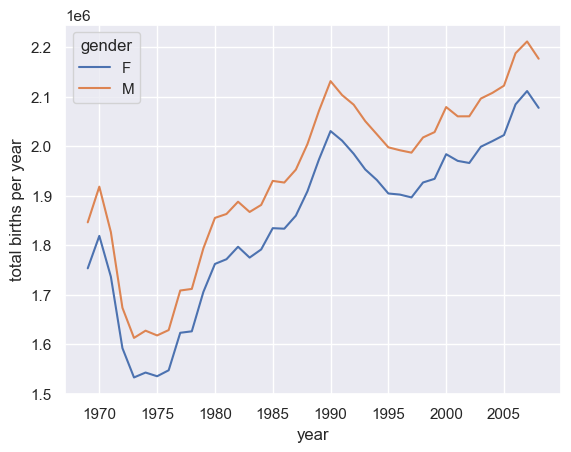

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

Con una simple tabla dinámica y el método ``plot()``, podemos ver inmediatamente la tendencia anual de los nacimientos por género. A ojo, parece que en los últimos 50 años los nacimientos masculinos han superado a los femeninos en aproximadamente un 5%.